In [1]:
import pandas as pd 
from fbprophet import Prophet
df = pd.read_csv('ISTATX_transformed.csv')

In [2]:
df

,10MIN_TIMESTAMP,TARGET_NAME,TARGET_GUID,CPU Usage (per second),Parallel Execution Downgraded 50% or more (per second),Parallel Execution Downgraded to Serial (per second),Redo Log Allocation Hit (%),Database CPU Time (%),Buffer Cache Hit (%),Library Cache Miss (%),...,Scans on Long Tables (per transaction),Consistent Read Blocks Created (per transaction),Active Sessions Waiting: I/O,Enqueue Waits (per second),Consistent Read Blocks Created (per second),Physical Writes Direct (per transaction),Enqueue Deadlocks (per second),Database Block Gets (per second),Physical Reads Direct (per second),Enqueue Timeout (per second)
0,2019-09-11 14:00:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,839.051,0.0,0.000,100.000,97.371,35.435,9.007,...,27.538,0.488,0.526,6.078,0.608,272.373,0.0,709.581,79032.649,1.254
1,2019-09-11 14:10:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1974.909,0.0,0.000,100.000,93.148,43.160,1.983,...,2.949,0.113,1.561,4.043,0.127,254.470,0.0,396.401,6913.292,1.058
2,2019-09-11 14:20:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,998.234,0.0,0.000,100.000,98.669,52.094,4.167,...,3.593,29.400,0.068,65.871,107.195,844.889,0.0,259430.422,20580.538,1.636
3,2019-09-11 14:30:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1451.615,0.0,0.000,100.000,68.563,91.018,15.951,...,30.746,77.621,4.527,36.868,124.272,9841.760,0.0,158688.275,96763.853,1.684
4,2019-09-11 14:40:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,3970.455,0.0,0.013,100.000,86.197,62.206,1.631,...,2.335,45.502,5.682,17.806,103.918,2135.373,0.0,81412.382,13756.376,1.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-09-19 13:10:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1840.426,0.0,0.000,99.999,88.219,54.829,1.726,...,1.572,0.201,1.174,23.743,5.811,466.551,0.0,21035.396,28952.743,1.733
1148,2019-09-19 13:20:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,549.790,0.0,0.000,99.999,99.046,49.447,1.180,...,0.126,0.154,0.327,5.833,2.012,152.832,0.0,1785.689,2080.242,0.621
1149,2019-09-19 13:30:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1087.638,0.0,0.000,99.997,79.040,62.552,3.782,...,1.500,0.173,1.928,21.497,1.935,912.089,0.0,12552.082,19619.102,0.661
1150,2019-09-19 13:40:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1919.131,0.0,0.017,100.000,82.757,53.162,7.394,...,5.363,0.149,3.949,14.110,2.082,588.196,0.0,17297.958,35404.533,0.917


In [3]:
dataset = df[['10MIN_TIMESTAMP','CPU Usage (per second)']].copy()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 2 columns):
10MIN_TIMESTAMP           1152 non-null object
CPU Usage (per second)    1152 non-null float64
dtypes: float64(1), object(1)
memory usage: 18.1+ KB


In [5]:
dataset.columns = ["ds","y"]
dataset['ds'] = pd.to_datetime(dataset['ds'])
dataset.head()

,ds,y
0,2019-09-11 14:00:00,839.051
1,2019-09-11 14:10:00,1974.909
2,2019-09-11 14:20:00,998.234
3,2019-09-11 14:30:00,1451.615
4,2019-09-11 14:40:00,3970.455


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 2 columns):
ds    1152 non-null datetime64[ns]
y     1152 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.1 KB


In [7]:
dataset

,ds,y
0,2019-09-11 14:00:00,839.051
1,2019-09-11 14:10:00,1974.909
2,2019-09-11 14:20:00,998.234
3,2019-09-11 14:30:00,1451.615
4,2019-09-11 14:40:00,3970.455
...,...,...
1147,2019-09-19 13:10:00,1840.426
1148,2019-09-19 13:20:00,549.790
1149,2019-09-19 13:30:00,1087.638
1150,2019-09-19 13:40:00,1919.131


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


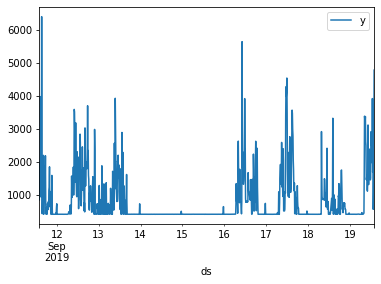

In [8]:
pd.plotting.register_matplotlib_converters()
dataset.plot(x='ds')

In [9]:
len(dataset)

1152

In [10]:
train=dataset[:-36]
test= dataset[-36:]
train.tail()

,ds,y
1111,2019-09-19 07:10:00,401.318
1112,2019-09-19 07:20:00,412.640
1113,2019-09-19 07:30:00,404.776
1114,2019-09-19 07:40:00,418.677
1115,2019-09-19 07:50:00,419.657


In [17]:
# https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html
m = Prophet(yearly_seasonality=True,weekly_seasonality=150) 
m.fit(train)
future = m.make_future_dataframe(periods=36,freq='10min')
forecast = m.predict(future)

In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1147,2019-09-19 13:10:00,2622.224458,2519.489834,3397.966145,2622.224455,2622.224461,331.522828,331.522828,331.522828,163.163932,...,1189.080415,1189.080415,1189.080415,-1020.721519,-1020.721519,-1020.721519,0.0,0.0,0.0,2953.747286
1148,2019-09-19 13:20:00,2622.441441,2485.655034,3352.756007,2622.441438,2622.441445,301.197026,301.197026,301.197026,155.577647,...,1162.422825,1162.422825,1162.422825,-1016.803445,-1016.803445,-1016.803445,0.0,0.0,0.0,2923.638467
1149,2019-09-19 13:30:00,2622.658425,2078.877653,2957.462447,2622.658422,2622.658429,-120.929852,-120.929852,-120.929852,148.959970,...,742.989229,742.989229,742.989229,-1012.879050,-1012.879050,-1012.879050,0.0,0.0,0.0,2501.728573
1150,2019-09-19 13:40:00,2622.875408,1458.486012,2326.947780,2622.875405,2622.875412,-732.629940,-732.629940,-732.629940,143.327575,...,132.990824,132.990824,132.990824,-1008.948338,-1008.948338,-1008.948338,0.0,0.0,0.0,1890.245469
1151,2019-09-19 13:50:00,2623.092392,945.601830,1793.031816,2623.092388,2623.092396,-1241.664302,-1241.664302,-1241.664302,138.663351,...,-375.316336,-375.316336,-375.316336,-1005.011316,-1005.011316,-1005.011316,0.0,0.0,0.0,1381.428090


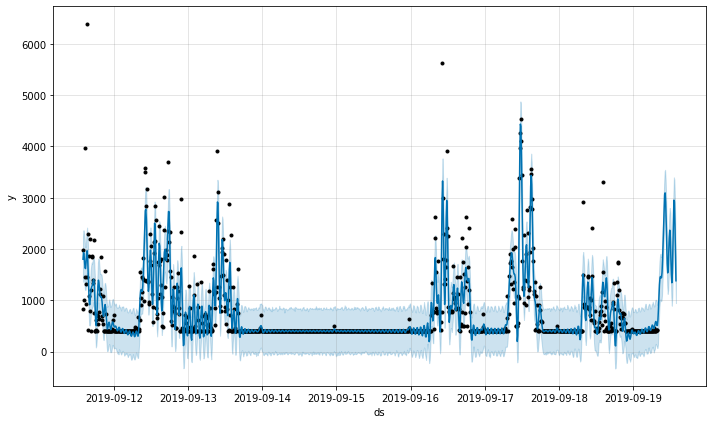

In [19]:
fig1 = m.plot(forecast)

In [20]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.ds, y=train.y,
                    mode='lines',
                    name='Train Data',
                    line_color='#000'))
fig.add_trace(go.Scatter(x=test.ds, y=test.y,
                    mode='lines',
                    name='Test Data')),
fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat,
                    mode='lines',
                    name='Phrophet Fit/Prediction',
                    line_color='#0072b2'))
fig.update_layout(
    title="Prophet Forecast",
    )
fig.show()

In [15]:
train

,ds,y
0,2019-09-11 14:00:00,839.051
1,2019-09-11 14:10:00,1974.909
2,2019-09-11 14:20:00,998.234
3,2019-09-11 14:30:00,1451.615
4,2019-09-11 14:40:00,3970.455
...,...,...
1111,2019-09-19 07:10:00,401.318
1112,2019-09-19 07:20:00,412.640
1113,2019-09-19 07:30:00,404.776
1114,2019-09-19 07:40:00,418.677


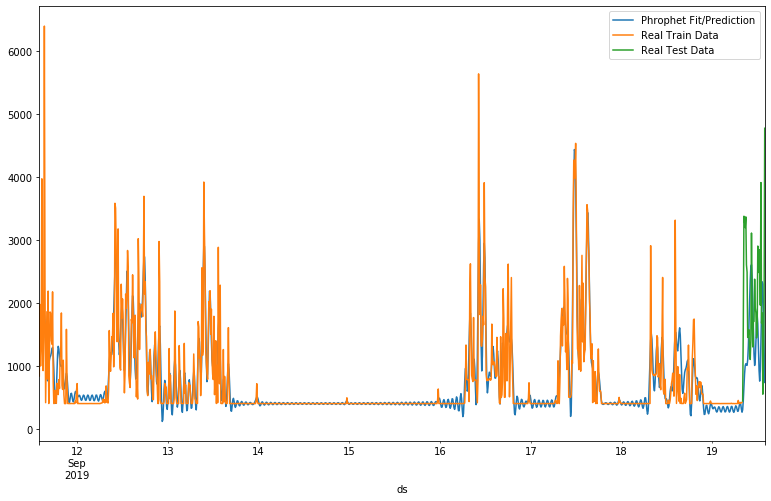

In [16]:
ax = forecast.plot(x='ds', y='yhat', label='Phrophet Fit/Prediction',legend=True, figsize= (13,8))
train.plot(x='ds',y='y', label='Real Train Data', legend= True, ax =ax )
test.plot(x='ds',y='y', label='Real Test Data', legend= True, ax =ax,  )